## 1. Cargar librerías y datos
Importamos las librerías necesarias y cargamos el dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Cargar datos
df = pd.read_csv('SocialNetworkAds.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 2. Selección de columnas
Seleccionamos solo las columnas relevantes para el modelo: `Age` y `EstimatedSalary` como variables predictoras, y `Purchased` como variable objetivo.

**Explicación:**
El objetivo es predecir si una persona comprará o no el producto a partir de su edad y salario estimado. Por eso, descartamos columnas como `User ID` y `Gender` para este ejercicio.

In [2]:
# Selección de columnas
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


## 3. Preprocesamiento: Estandarización
Estandarizamos las variables predictoras para que tengan media 0 y desviación estándar 1.

**Explicación:**
La estandarización es importante para algoritmos basados en distancias como KNN, ya que evita que una variable domine sobre la otra por su escala.

In [3]:
# Separar en entrenamiento y test antes de estandarizar para evitar data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Data Sampler (Muestreo de datos)
Dividimos los datos en conjunto de entrenamiento y test.

**Explicación:**
El muestreo permite evaluar el desempeño del modelo en datos no vistos durante el entrenamiento, simulando su comportamiento en la práctica.

In [4]:
print(f'Tamaño del set de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del set de test: {X_test.shape[0]} muestras')

Tamaño del set de entrenamiento: 280 muestras
Tamaño del set de test: 120 muestras


## 5. Entrenamiento del modelo KNN
Entrenamos un clasificador KNN (K-Nearest Neighbors) con los datos de entrenamiento.

**Explicación:**
KNN es un algoritmo supervisado que clasifica una muestra según la mayoría de sus vecinos más cercanos en el espacio de características.

In [5]:
# Entrenamiento con K=5 (puedes ajustar este valor)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## 6. Test and Score (Evaluación del modelo)
Evaluamos el modelo en el conjunto de test y calculamos la exactitud (accuracy).

**Explicación:**
La exactitud mide la proporción de predicciones correctas sobre el total de muestras. Es una métrica básica para clasificación binaria.

In [6]:
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (accuracy) en test: {accuracy:.2f}')

Exactitud (accuracy) en test: 0.92


## 7. Predicciones
Mostramos algunas predicciones junto a los valores reales.

**Explicación:**
Comparar las predicciones con los valores reales permite identificar aciertos y errores del modelo.

In [7]:
resultados = X_test.copy()
resultados['Real'] = y_test.values
resultados['Predicción'] = y_pred
resultados.head(10)

,Age,EstimatedSalary,Real,Predicción
300,58,38000,1,1
195,34,43000,0,0
215,60,108000,1,1
276,38,71000,0,0
395,46,41000,1,0
1,35,20000,0,0
399,49,36000,1,1
73,33,113000,0,1
153,36,50000,0,0
393,60,42000,1,1


## 8. Scatter Plot
Visualizamos los resultados en un scatter plot, coloreando según la predicción.

**Explicación:**
El scatter plot permite observar la distribución de las predicciones en el espacio de características y detectar posibles patrones o errores sistemáticos.

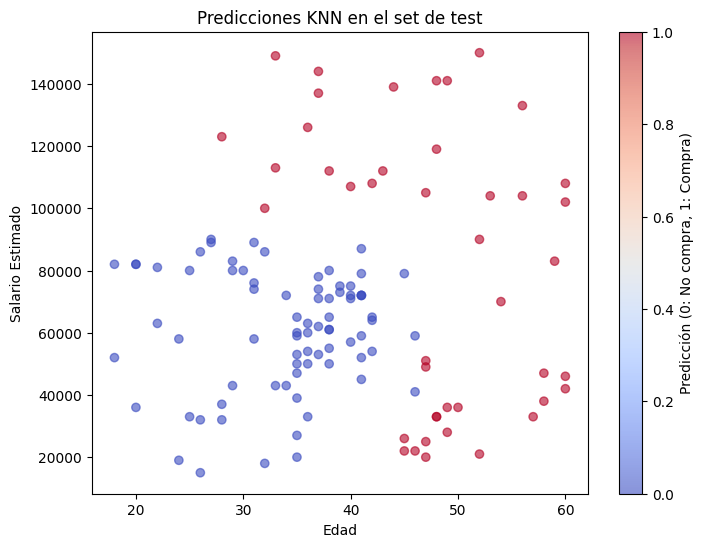

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_pred, cmap='coolwarm', alpha=0.6, label='Predicción')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.title('Predicciones KNN en el set de test')
plt.colorbar(label='Predicción (0: No compra, 1: Compra)')
plt.show()

## 9. Confusion Matrix (Matriz de confusión)
Mostramos la matriz de confusión y el reporte de clasificación.

**Explicación:**
La matriz de confusión muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Es útil para entender los tipos de errores del modelo.

En la matriz de confusión para un problema binario como este (`Purchased`: 0 = No compra, 1 = Compra), la interpretación es:

- **Verdaderos Positivos (VP o True Positives, TP):**  
  Casos donde el modelo predijo “Compra” (1) y realmente la persona compró (1).

- **Verdaderos Negativos (VN o True Negatives, TN):**  
  Casos donde el modelo predijo “No compra” (0) y realmente la persona no compró (0).

- **Falsos Positivos (FP):**  
  Casos donde el modelo predijo “Compra” (1) pero en realidad la persona no compró (0).  
  (Error tipo I: “falso alarma”)

- **Falsos Negativos (FN):**  
  Casos donde el modelo predijo “No compra” (0) pero en realidad la persona sí compró (1).  
  (Error tipo II: “se le escapó”)

**¿Cómo se ve en la matriz?**

|                 | Real: No compra (0) | Real: Compra (1) |
|-----------------|--------------------|------------------|
| **Predice 0**   | VN                 | FN               |
| **Predice 1**   | FP                 | VP               |

**¿Qué significa cada uno?**
- **VP:** El modelo acierta prediciendo compras.
- **VN:** El modelo acierta prediciendo no compras.
- **FP:** El modelo predice compra, pero no ocurre (puede implicar gasto innecesario en marketing).
- **FN:** El modelo no predice compra, pero sí ocurre (puede implicar oportunidad de venta perdida).

Ayuda a entender no solo la exactitud, sino también qué tipo de errores comete el modelo y cómo podrían impactar en el negocio.

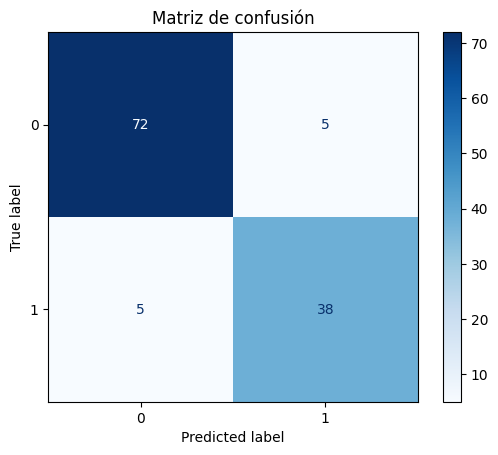

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.88      0.88      0.88        43

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

print(classification_report(y_test, y_pred))

En el contexto de la matriz de confusión para este problema (predicción de compra):

- **Error de tipo 1 (Falso Positivo, FP):**  
  El modelo predice que la persona comprará (1), pero en realidad NO compra (0).  
  **Interpretación:** Es una “falsa alarma”. Podrías gastar recursos en marketing en alguien que no va a comprar.

- **Error de tipo 2 (Falso Negativo, FN):**  
  El modelo predice que la persona NO comprará (0), pero en realidad SÍ compra (1).  
  **Interpretación:** Es una “oportunidad perdida”. El modelo no identifica a un cliente potencial, por lo que podrías dejar de ganar una venta.

**Resumen:**
- **Tipo 1 (FP):** El modelo “cree” que hay compra, pero no la hay.
- **Tipo 2 (FN):** El modelo “cree” que no hay compra, pero sí la hay.

Ambos errores pueden tener impactos distintos en el negocio, dependiendo de qué sea más costoso: gastar recursos en clientes que no compran (FP) o perder ventas potenciales (FN).

## 10. Conclusiones y explicación de resultados

- **Selección de columnas:** Se usaron solo Edad y Salario estimado, ya que son las variables relevantes para la predicción.
- **Estandarización:** Fundamental para KNN, ya que ambas variables quedan en la misma escala.
- **Muestreo:** Permite evaluar el modelo en datos no vistos.
- **KNN:** Algoritmo sencillo y efectivo para clasificación binaria.
- **Evaluación:** La exactitud obtenida indica el porcentaje de aciertos del modelo.
- **Predicciones y scatter plot:** Permiten visualizar cómo el modelo separa las clases en el espacio de características.
- **Matriz de confusión:** Da información detallada sobre los aciertos y errores, permitiendo identificar si el modelo tiende a equivocarse más en una clase que en otra.

En resumen, el modelo KNN permite predecir con una precisión razonable si una persona comprará el producto tras la campaña, usando solo su edad y salario estimado.

## 11. Mejora del modelo o ajuste del umbral de decisión

Si **FP (Falsos Positivos)** es más bajo que **FN (Falsos Negativos)** en este caso, significa que el modelo comete menos errores prediciendo que una persona comprará cuando en realidad no compra (falsas alarmas), y comete más errores no detectando a personas que sí compran (oportunidades de venta perdidas).

**Interpretación en el contexto de marketing:**

- **FP bajo:** El modelo casi no recomienda gastar recursos en personas que no van a comprar (bueno para optimizar el presupuesto de marketing).
- **FN alto:** El modelo deja pasar muchas personas que sí habrían comprado, es decir, pierde oportunidades de venta (malo para maximizar ingresos).

**Conclusión:**  
El modelo es conservador: prefiere no arriesgarse a recomendar una campaña a alguien que no comprará, pero a cambio deja pasar posibles compradores. Si tu objetivo es maximizar ventas, deberías intentar reducir los FN, aunque eso implique aceptar más FP. Si tu objetivo es ahorrar presupuesto, este comportamiento puede ser aceptable.

In [10]:
# Obtener probabilidades de predicción
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Cambiar el umbral de decisión (por ejemplo, 0.3)
umbral = 0.3
y_pred_umbral = (y_proba >= umbral).astype(int)

# Nueva matriz de confusión y reporte
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_umbral))
print(classification_report(y_test, y_pred_umbral))

[[70  7]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        77
           1       0.85      0.93      0.89        43

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120




---

### **Original (umbral estándar 0.5):**
Matriz de confusión:
```
[[72  5]
 [ 5 38]]
```
- **FP (Falsos Positivos):** 5
- **FN (Falsos Negativos):** 5

### **Con ajuste de umbral (por ejemplo, 0.3):**
Matriz de confusión:
```
[[70  7]
 [ 3 40]]
```
- **FP (Falsos Positivos):** 7 (aumentan)
- **FN (Falsos Negativos):** 3 (disminuyen)

---

### **Interpretación:**

- Al bajar el umbral, el modelo **reduce los FN** (de 5 a 3): ahora detecta más personas que realmente comprarán (menos oportunidades de venta perdidas).
- Los **FP aumentan** (de 5 a 7): el modelo predice “compra” para más personas que finalmente no compran (más falsas alarmas).
- El **recall** para la clase 1 (compradores) sube de 0.88 a 0.93, lo que significa que el modelo identifica mejor a los compradores reales.
- El **precision** para la clase 1 baja un poco (de 0.88 a 0.85), porque hay más FP.

---

### **Conclusión de negocio:**

- **Si el objetivo es maximizar ventas**, este ajuste es adecuado: prefieres contactar a más posibles compradores (aunque algunos no compren) antes que dejar pasar ventas reales.
- **El costo:** gastarás más recursos en personas que no comprarán, pero perderás menos ventas potenciales.

